In [11]:
from graphviz import Source

# Route filter list

An `RouteFilterList` consists of a list of `RouteFilterLine` objects.
Each `RouteFilterLine` object represents a single line in a configuration file, 
which is used to filter network routes based on specific criteria.  

The class defines three main properties:
- `_action`: has type `LineAction`, and specifies the action to be taken when a route matches the filter line.
- `_ipWildcard`: an `IpWildcard` object representing the bits against which a route's prefix will be compared.
- `_lengthRange`: a `SubRange` object defining the acceptable range of prefix lengths for a route.

For instance, an object 
```
RouteFilterLine{
    Action=PERMIT, 
    IpWildCard=192.168.0.0/16, 
    LengthRange=[16,32]
}
```
permits routes with destination IPs in 192.168.0.0/16 and prefix lengths between 16 and 32.

The original line in the config file:
```
ip prefix-list private-ips seq 15 permit 192.168.0.0/16 ge 16
```

In its original encoding in Minesweeper, it is encoded as a constraint on 
the input symbolic route. 
In other words, the only variables in the resulting BDD is the symbolic fields
in the input route.

In [22]:
# The BDD encoding of this line
dot_content = """
digraph G {
0 [shape=box, label="0", style=filled, shape=box, height=0.3, width=0.3];
1 [shape=box, label="1", style=filled, shape=box, height=0.3, width=0.3];
577 [label="pfxLen5"]
577 -> 576[style=dotted]
577 -> 573[style=filled]
576 [label="pfxLen4"]
576 -> 575[style=dotted]
576 -> 573[style=filled]
575 [label="pfxLen3"]
575 -> 574[style=dotted]
575 -> 573[style=filled]
574 [label="pfxLen2"]
574 -> 572[style=dotted]
574 -> 573[style=filled]
572 [label="pfxLen1"]
572 -> 570[style=dotted]
572 -> 571[style=filled]
570 [label="pfxLen0"]
570 -> 0[style=dotted]
570 -> 547[style=filled]
547 [label="pfx15"]
547 -> 546[style=dotted]
547 -> 0[style=filled]
546 [label="pfx14"]
546 -> 545[style=dotted]
546 -> 0[style=filled]
545 [label="pfx13"]
545 -> 544[style=dotted]
545 -> 0[style=filled]
544 [label="pfx12"]
544 -> 0[style=dotted]
544 -> 543[style=filled]
543 [label="pfx11"]
543 -> 542[style=dotted]
543 -> 0[style=filled]
542 [label="pfx10"]
542 -> 0[style=dotted]
542 -> 541[style=filled]
541 [label="pfx9"]
541 -> 540[style=dotted]
541 -> 0[style=filled]
540 [label="pfx8"]
540 -> 0[style=dotted]
540 -> 539[style=filled]
539 [label="pfx7"]
539 -> 538[style=dotted]
539 -> 0[style=filled]
538 [label="pfx6"]
538 -> 537[style=dotted]
538 -> 0[style=filled]
537 [label="pfx5"]
537 -> 536[style=dotted]
537 -> 0[style=filled]
536 [label="pfx4"]
536 -> 535[style=dotted]
536 -> 0[style=filled]
535 [label="pfx3"]
535 -> 534[style=dotted]
535 -> 0[style=filled]
534 [label="pfx2"]
534 -> 520[style=dotted]
534 -> 0[style=filled]
520 [label="pfx1"]
520 -> 0[style=dotted]
520 -> 510[style=filled]
510 [label="pfx0"]
510 -> 0[style=dotted]
510 -> 1[style=filled]
571 [label="pfxLen0"]
571 -> 547[style=dotted]
571 -> 0[style=filled]
573 [label="pfxLen1"]
573 -> 0[style=dotted]
573 -> 571[style=filled]
}
"""

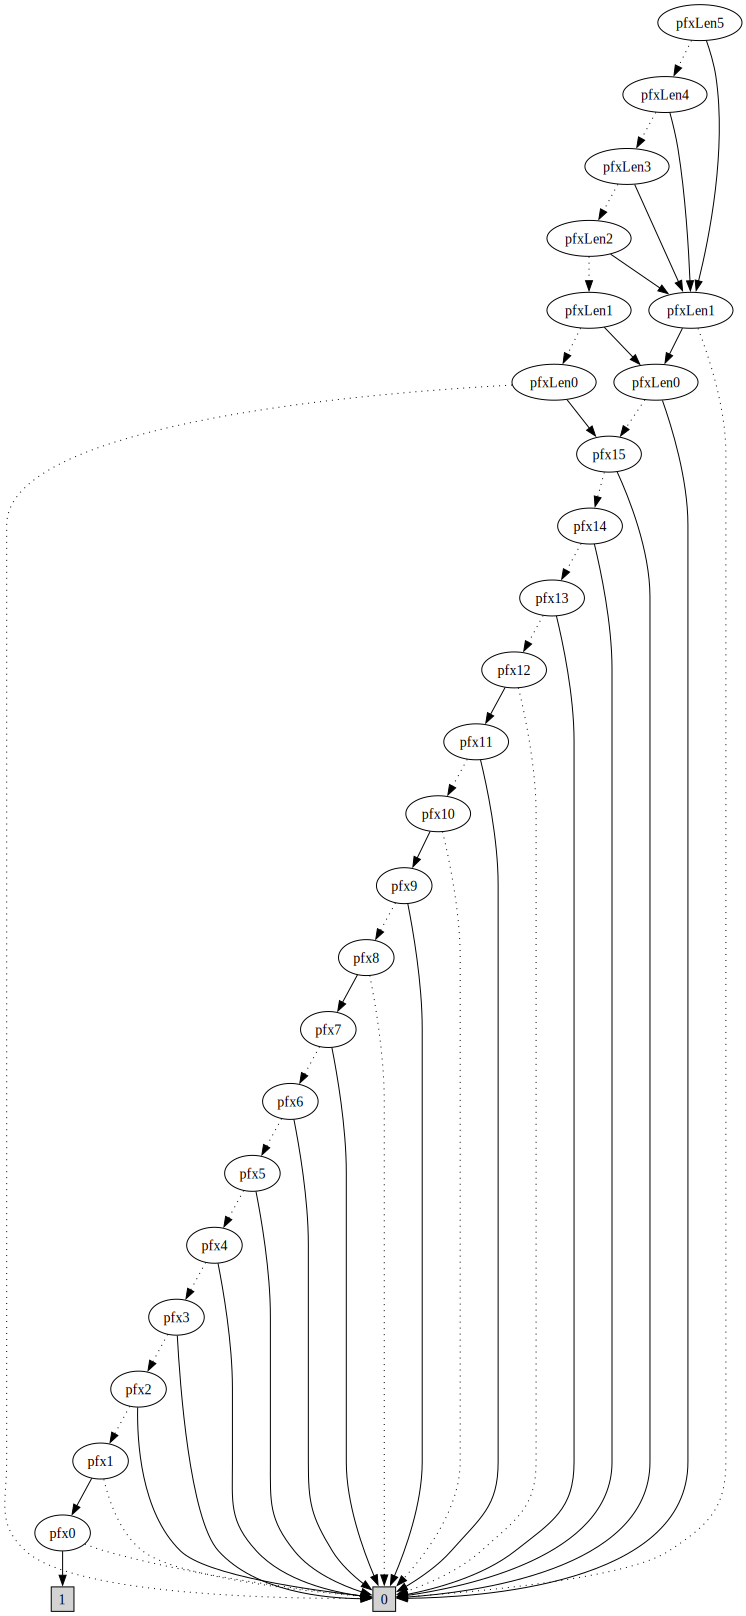

In [23]:
graph = Source(dot_content)
graph

As shown above, the BDD encoding flatterns the symbolic route
into a vector of bits, which is too low-level for simplification and
interpretation. 
Instead, we want to have some thing higher level than BDD.

Instead, what we want is the following encoding.
Let `InRoute.prefix` and `InRoute.prefixLen` be the symbolic variable 
for the prefix and prefix length fields of the input route: 
```
FirstBitsMatch(InRoute.prefix, Prefix) 
/\ 16 <= InRoute.prefixLen <= 32
```

In [ ]:
# 